<a href="https://colab.research.google.com/github/Disguyranger/5AndAlive/blob/master/Final_Project_20220710_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIT580: Analytics: Big Data to Information Final Project

## Team 1: Jeffrey Stejskal, John Vega, Nicholas Weber

## Dr. Eddy Zhang Section 001

## George Mason University

## Importing 

In [ ]:
##Wrapping everything on here that way it is usable. 

In [ ]:
from __future__ import print_function
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns,\
    numpy as np, glob, time, requests, tkinter as tk
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from tkinter import *
from matplotlib.pyplot import figure
from scipy import stats
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.model_selection import train_test_split
#import scipy.sparse as sp
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

## Preprocessing

In [ ]:
class PreProcessing:
    """
    Class is used to perform cleaning based on inputs.
    """

    def __init__(self, dataframe=None):
        self.df = dataframe

    def visualize_missing_values(self):
        df = self.df
        missing_values = df.isnull().sum()
        missing_values_perc = 100 * df.isnull().sum() / len(df)
        types = df.dtypes
        types.replace({"object": "str"}, inplace=True)
        missing_values_table = pd.concat([missing_values, missing_values_perc, types], axis=1)
        renamed_table_columns = missing_values_table.rename(columns={0: "Missing Values",
                                                                     1: "% of Total Values",
                                                                     2: "Type"})
        renamed_table_columns = renamed_table_columns.sort_values("% of Total Values", ascending=False).round(1)
        plt.figure(figsize=(13, 6))
        sns.set(style="whitegrid", color_codes=True)
        sns.barplot(x=renamed_table_columns.index, y=renamed_table_columns["% of Total Values"],
                    data=renamed_table_columns)
        plt.xticks(rotation=90)
        plt.title("Percent of Missing Values")
        plt.show()
        return renamed_table_columns

    def alt_visualize_missing_values(self):
        """
        Uses Seaborn
        :return:
        """

        sns.heatmap(self.df.isnull(), yticklabels=False, cbar=False, cmap="Blues")
        return self.df.isnull()

    def correlation_matrix(self):
        """
        for map, utility is given to two types, can be expanded upon at a later date.
        :param map:
        :return:
        """
        df = self.df
        plt.figure(figsize=(8, 8))
        sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
        plt.show()
        return df.corr()

    def categorical_to_numeric(self):
        df = self.df


    def cleaning_dataframe(self, thresh_hold=.4, method='SI', mode='mean', state_or_neighbors=2):
        """
        SimpleImputer is univariate, taking only a single feature into account.
        IterativeImputer takes a multivariate approach, or uses multiple features.
        KNNImputer takes a multivariate approach, or uses multiple features.
        This will try and make predictions for the missing values depending on
        which columns are passed to the imputation method.
        ATTENTION: CAN ONLY FIND NUMERICAL INPUTS - NOT FOR QUALITATIVE DATA
        :param state_or_neighbors:
        :param thresh_hold:
        :param method:
        :param mode:
        :return:
        """
        if method == 'SI':
            impute_data = SimpleImputer(missing_values=np.nan, strategy=mode, verbose=0)
        elif method == 'II':
            impute_data = IterativeImputer()
        else:
            impute_data = KNNImputer(n_neighbors=state_or_neighbors)
        df = self.df
        for column in df:
            if df[column].isnull().sum() / len(df) >= thresh_hold:
                df.drop(columns=column, axis=1)
            else:
                impute_df = impute_data.fit_transform(df.select_dtypes(exclude=['str', 'obj']))

        return df

    def train_dataset(self, column_name, tSize=.6, rStates=5):
        """
        Takes in class information, currently dataframe.
        column_name is the column you want to predict.
        tSize is the test_size for train_test_split function.
        rStates is the number of random states for train_test_split function.
        :param column_name:
        :param tSize:
        :param rStates:
        :return:
        """
        df = self.df
        X_train, X_test, y_train, y_test = train_test_split(df.iloc[:-1], df.iloc[-1], test_size=tSize, random_state=rStates)

        return X_train, X_test, y_train, y_test


## Loading Data

In [ ]:
#Plug in data location on personal computer until I make the connection on Google.
df_test = pd.read_csv(r'C:\Users\Nicholas Weber\Documents\AIT 580/house-prices-advanced-regression-techniques\house_price_test.csv')
df_train = pd.read_csv(r'C:\Users\Nicholas Weber\Documents\AIT 580/house-prices-advanced-regression-techniques\house_price_train.csv')

## Splitting Data

In [ ]:
#This is based off the heatmap of correlations. Please see heatmap in visualization section.
X = df_train[["TotalBsmtSF", "1stFlrSF", "GrLivArea", "GarageArea", "OverallQual", "GarageCars"]]
y = df_train['SalePrice']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=10)

## Machine Learning Models

### Linear Regression

In [ ]:
##Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
Accuracy =r2_score(y_test, y_pred) * 100
print(f"Model for {str(regressor)[:-2]} computes at: {round(Accuracy,0)}% accuracy")

Model for LinearRegression computes at: 78.0% accuracy


### Random Forest

In [ ]:
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
Accuracy =r2_score(y_test, y_pred) * 100
print(f"Model for {str(regressor)[:22]} computes at: {round(Accuracy,0)}% accuracy")
feature_list = list(X.columns)
feature_importance = pd.Series(RandomForestClassifier.feature_importances_, index=feature_list)
print(f"Columns importance based off the following: \n{feature_importance}")

Model for RandomForestRegressor( computes at: 86.0% accuracy
Columns importance based off the following: 
TotalBsmtSF    <property object at 0x00000252E3D3BBD0>
1stFlrSF       <property object at 0x00000252E3D3BBD0>
GrLivArea      <property object at 0x00000252E3D3BBD0>
GarageArea     <property object at 0x00000252E3D3BBD0>
OverallQual    <property object at 0x00000252E3D3BBD0>
GarageCars     <property object at 0x00000252E3D3BBD0>
dtype: object


### K Nearest Neighbors

In [ ]:
regressor = KNeighborsRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
Accuracy =r2_score(y_test, y_pred) * 100
print(Accuracy)

74.0491221322247


## Visualizations

### Correlation Matrix

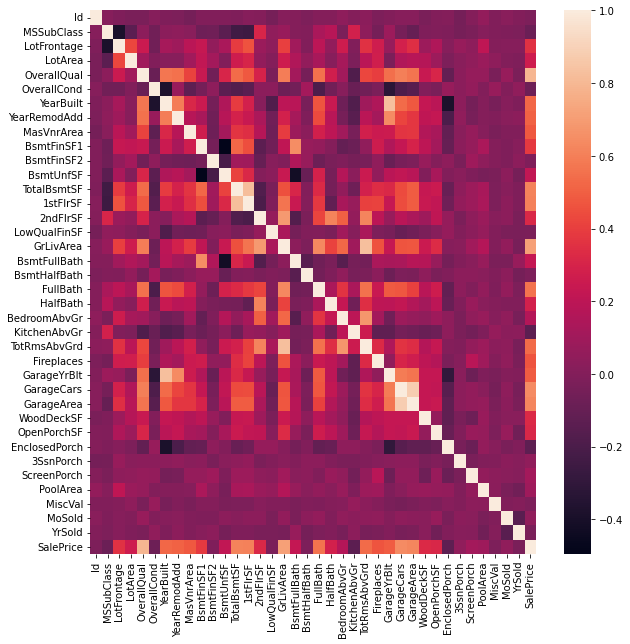

<Figure size 720x720 with 0 Axes>

In [ ]:
df = df_train
matrix = df.corr()
sns.heatmap(matrix)
plt.figure(figsize = (10,10))
plt.show()

#### Since the correlation matrix has a ton of features, we filtered the correlation matrix by features absolute value that had a positive correlation with 'SalePrice'.

In [ ]:
correlation_mat = df.corr()
corr_pairs = correlation_mat.unstack()

sorted_pairs = abs((corr_pairs.sort_values(kind="quicksort") > 0.6) & (corr_pairs.sort_values(kind="quicksort") < 0.9))
print(sorted_pairs['SalePrice'])

KitchenAbvGr     False
EnclosedPorch    False
MSSubClass       False
OverallCond      False
YrSold           False
LowQualFinSF     False
Id               False
MiscVal          False
BsmtHalfBath     False
BsmtFinSF2       False
3SsnPorch        False
MoSold           False
PoolArea         False
ScreenPorch      False
BedroomAbvGr     False
BsmtUnfSF        False
BsmtFullBath     False
LotArea          False
HalfBath         False
OpenPorchSF      False
2ndFlrSF         False
WoodDeckSF       False
LotFrontage      False
BsmtFinSF1       False
Fireplaces       False
MasVnrArea       False
GarageYrBlt      False
YearRemodAdd     False
YearBuilt        False
TotRmsAbvGrd     False
FullBath         False
1stFlrSF          True
TotalBsmtSF       True
GarageArea        True
GarageCars        True
GrLivArea         True
OverallQual       True
SalePrice        False
dtype: bool


#### After the filtering for the positively correlated features with 'SalePrice', we created a new correlation matrix with the six features.

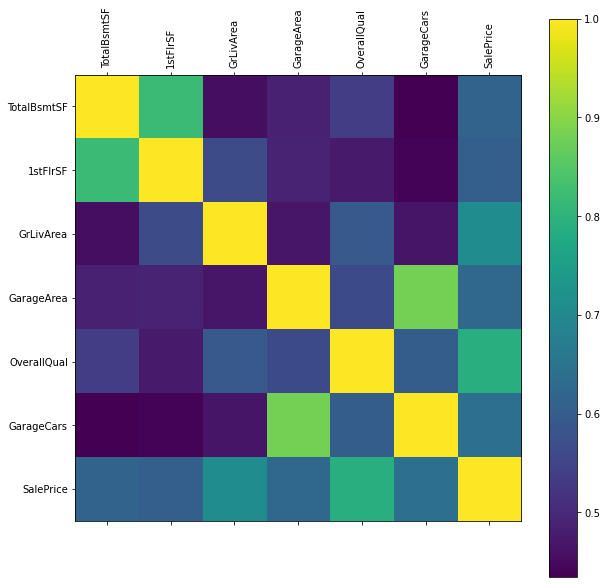

In [ ]:
df = df_train[["TotalBsmtSF", "1stFlrSF", "GrLivArea", "GarageArea", "OverallQual", "GarageCars", "SalePrice"]]
plt.rcParams["figure.figsize"] = (10,10)
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)), df.columns, rotation = 90)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()

### Linear Regression Visualization

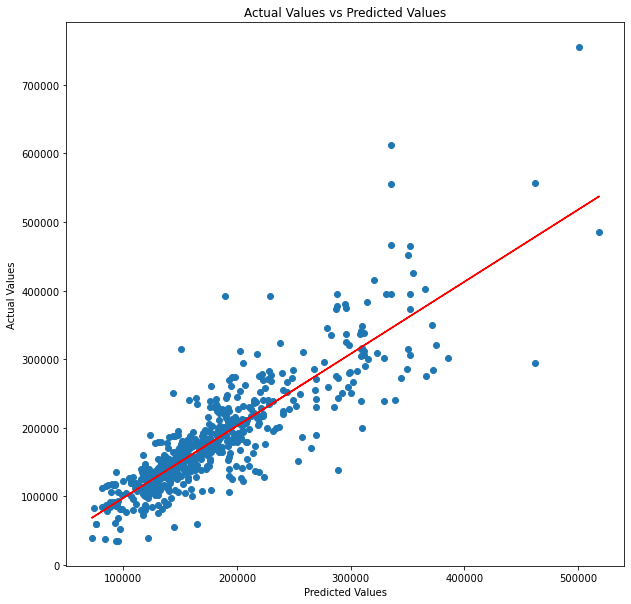

In [ ]:
plt.scatter(y_pred, y_test)
m, b = np.polyfit(y_pred, y_test, 1)
plt.plot(y_pred, m * y_pred + b, color = "red")
plt.title("Actual Values vs Predicted Values")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

### Decision Tree Visualization

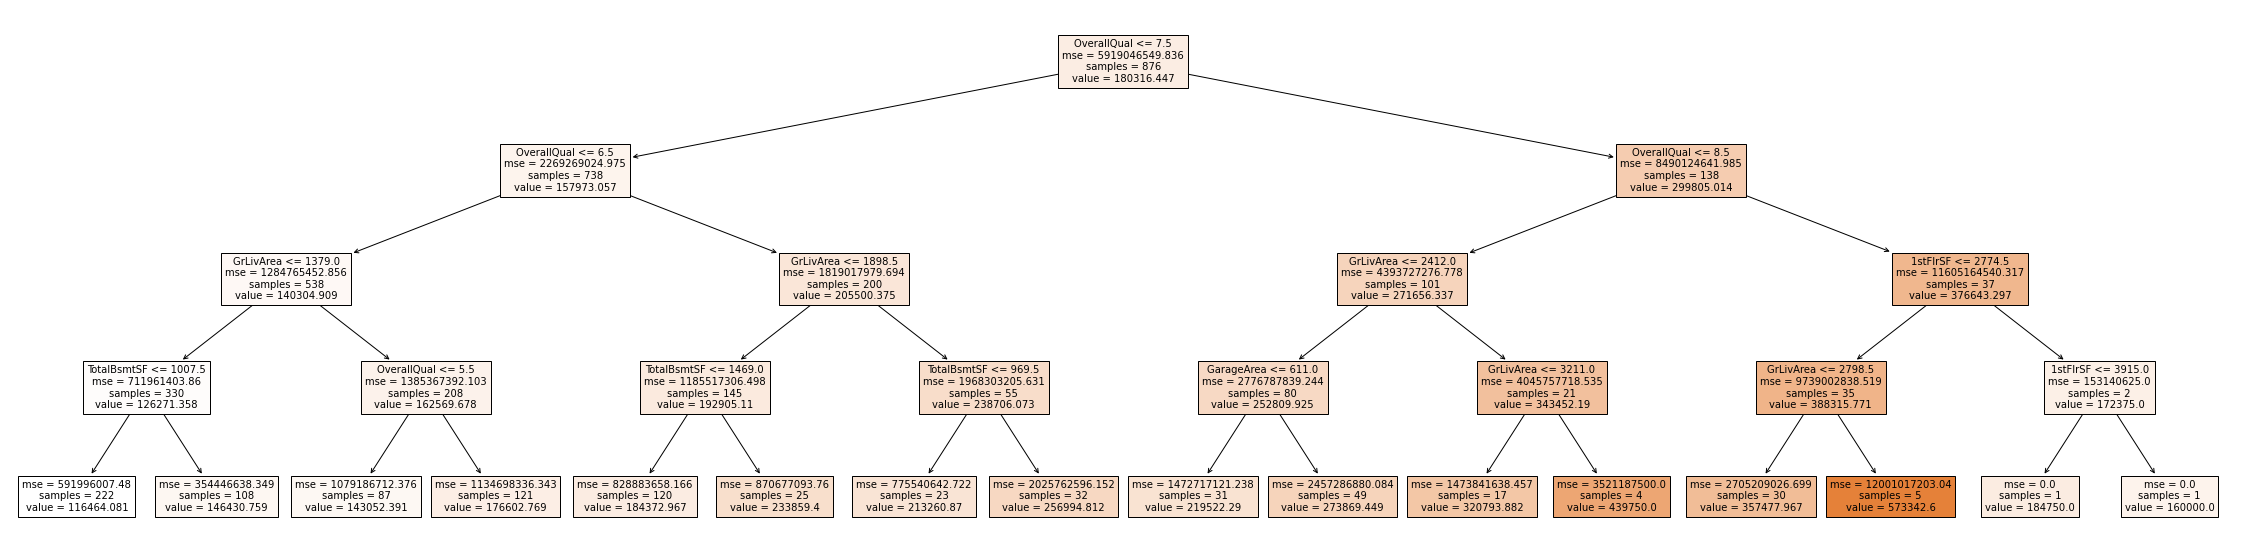

In [ ]:
dt = DecisionTreeRegressor(max_depth = 4)
dt = dt.fit(X_train, y_train)

fig = plt.figure(figsize = (40,10))
tree.plot_tree(dt, feature_names = X.columns, class_names = y.name, filled = True, fontsize = 10)

plt.savefig('decisiontree.png')


###  K Nearest Neighbors Visualization

In [ ]:
import warnings
warnings.simplefilter("ignore")
#%%
def get_neighbors(xs, sample, k=5):
    neighbors = [(x, np.sum(np.abs(x - sample))) for x in xs]
    neighbors = sorted(neighbors, key=lambda x: x[1])
    return np.array([x for x, _ in neighbors[:k]])

df_train = df_train.rename(columns={"1stFlrSF":"FirstFlrSF"})
X = df_train[["TotalBsmtSF", "FirstFlrSF", "GrLivArea", "GarageArea", "OverallQual", "GarageCars"]]
cols = df_train[["TotalBsmtSF", "FirstFlrSF", "GrLivArea", "GarageArea", "OverallQual", "GarageCars"]]
x = X.columns
y = df_train['SalePrice']
counter = 0
for i in cols:
    X.rename(columns={i: counter}, inplace=True)
    counter +=1

In [ ]:
X = np.array(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=10)
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)



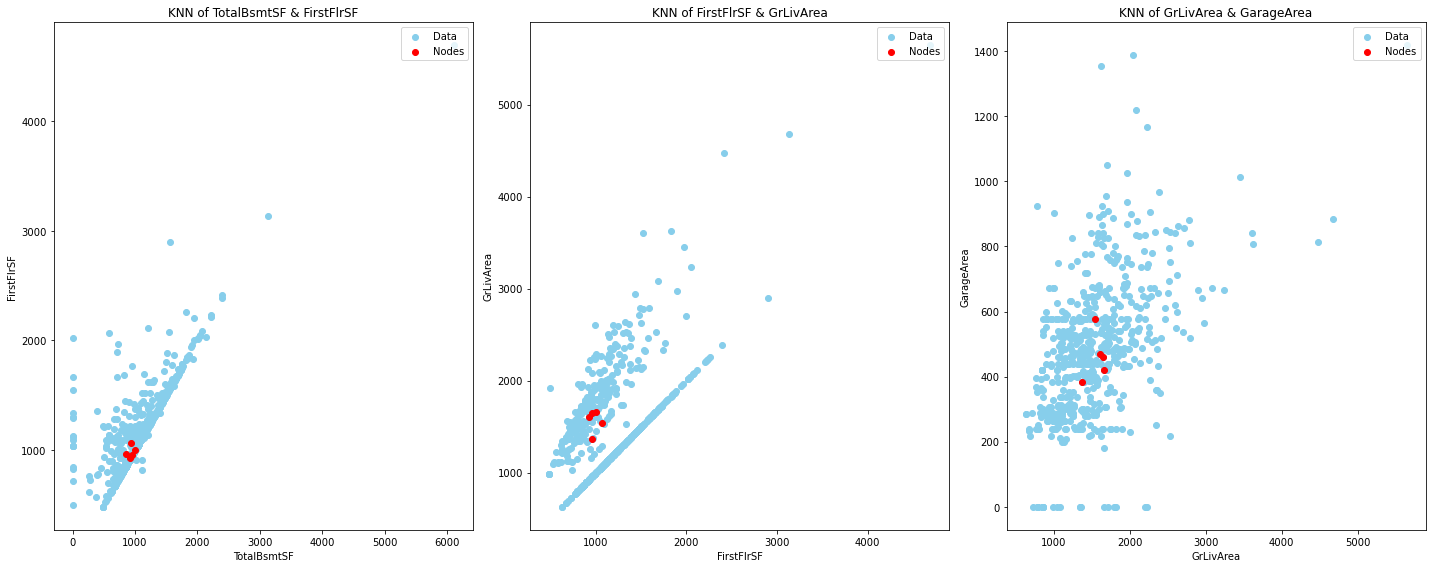

In [ ]:
counter = 0
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
for i in range(3):
    sample = X_test
    neighbors = get_neighbors(X_train, sample)
    ax[i].scatter(X_train[:, i], X_train[:, i+1], c="skyblue")
    ax[i].scatter(neighbors[:, i], neighbors[:, i+1], c="red")
    ax[i].set_xlabel(x[i])
    ax[i].set_ylabel(x[i+1])
    ax[i].title.set_text(f"KNN of {x[i]} & {x[i+1]}")
    ax[i].legend(["Data", "Nodes"],loc='upper right')
plt.tight_layout()

## References